In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

iris_grouped_df = iris_df.groupby('target').mean().round(1)

condition_list = [iris_grouped_df.index == 0,iris_grouped_df.index == 1,iris_grouped_df.index == 2]
choice_list = ['setosa' , 'versicolor', 'virginica']
iris_grouped_df['target_name'] = np.select(condition_list, choice_list, default='unknown')
iris_grouped_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
target,,,,,
0.0,5.0,3.4,1.5,0.2,setosa
1.0,5.9,2.8,4.3,1.3,versicolor
2.0,6.6,3.0,5.6,2.0,virginica


**Matplotlib Chart and Table in PDF example**

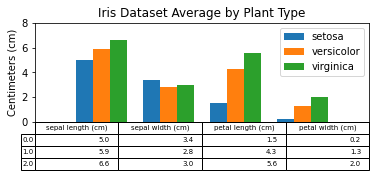

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import table

ax = plt.subplot(211)
plt.title("Iris Dataset Average by Plant Type")
plt.ylabel('Centimeters (cm)')

ticks = [4,8,12,16]
a = [x - 1 for x in ticks]
b = [x + 1 for x in ticks]

plt.xticks([])

plt.bar(a, iris_grouped_df.loc[0].values.tolist()[:-1], width=1, label="".join(iris_grouped_df.loc[0].values.tolist()[-1:]))
plt.bar(ticks, iris_grouped_df.loc[1].values.tolist()[:-1], width=1, label="".join(iris_grouped_df.loc[1].values.tolist()[-1:]))
plt.bar(b, iris_grouped_df.loc[2].values.tolist()[:-1], width=1, label="".join(iris_grouped_df.loc[2].values.tolist()[-1:]))

plt.legend()
plt.axis([0, 20, 0, 8])

table(ax, iris_grouped_df.drop(['target_name'], axis=1), loc='bottom')
plt.savefig('iris_grouped_df.pdf')


**Matplotlib Chart and FPDF Table in PDF example**

''

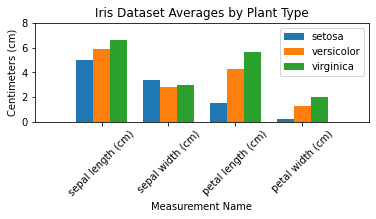

In [5]:
!pip install fpdf
from fpdf import FPDF
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

ax = plt.subplot(211)
plt.title("Iris Dataset Averages by Plant Type")
plt.xlabel("Measurement Name")
plt.ylabel("Centimeters (cm)")

ticks = [4.0, 8.0, 12.0, 16.0]
a = [x - 1 for x in ticks]
b = [x + 1 for x in ticks]

plt.xticks(ticks,list(iris_grouped_df.drop(['target_name'], axis=1).columns), rotation=45)
plt.bar(a, iris_grouped_df.loc[0].values.tolist()[:-1], width=1, label="".join(iris_grouped_df.loc[0].values.tolist()[-1:]))
plt.bar(ticks, iris_grouped_df.loc[1].values.tolist()[:-1], width=1, label="".join(iris_grouped_df.loc[1].values.tolist()[-1:]))
plt.bar(b, iris_grouped_df.loc[2].values.tolist()[:-1], width=1, label="".join(iris_grouped_df.loc[2].values.tolist()[-1:]))

plt.legend()
plt.axis([0, 20, 0, 8])

plt.savefig('iris_grouped_df.png')

pdf=FPDF()
pdf.add_page()
pdf.set_font('arial', 'B', 11)
pdf.cell(60)
pdf.cell(75, 10,'Iris Dataset Measurements by Class', 0, 2, 'C')
pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-55)
columnNameList = list(iris_grouped_df.columns)
for header in columnNameList[:-1]:
  pdf.cell(35, 10, header, 1, 0, 'C')
pdf.cell(35, 10, columnNameList[-1], 1, 2, 'C')
pdf.cell(-140)
pdf.set_font('arial', '', 11)
for row in range(0, len(iris_grouped_df)):
  for col_num, col_name in enumerate(columnNameList):
    if col_num != len(columnNameList) - 1:
      pdf.cell(35, 10, str(iris_grouped_df['%s' % (col_name)].iloc[row]), 1, 0, 'C')
    else:
      pdf.cell(35, 10, str(iris_grouped_df['%s' % (col_name)].iloc[row]), 1, 2, 'C')
      pdf.cell(-140)
pdf.cell(35, 10, "", 0, 2)
pdf.cell(20)
pdf.image('iris_grouped_df.png', x = None, y = None, w = 0, h = 0, type = '', link = '')
pdf.output('iris_grouped_df_1.pdf', 'F')

     